In [0]:
import pandas as pd

In [8]:
df=pd.read_csv("play_tennis.csv")
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [9]:
df.isnull().sum() # verificar datos nulos

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [0]:
del df["day"]


In [11]:
df.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [0]:
from sklearn import preprocessing

In [0]:
#MAPEO outlook
loutlook = preprocessing.LabelEncoder() 
loutlook = loutlook.fit(df['outlook'])
df['outlook'] = loutlook.transform(df['outlook'])

In [18]:
df['outlook'].value_counts()
df.head()

,outlook,temp,humidity,wind,play
0,2,Hot,High,Weak,No
1,2,Hot,High,Strong,No
2,0,Hot,High,Weak,Yes
3,1,Mild,High,Weak,Yes
4,1,Cool,Normal,Weak,Yes


In [19]:
outlook_Mapeado = dict(zip(loutlook.classes_, loutlook.transform(loutlook.classes_)))
print(outlook_Mapeado)

{'Overcast': 0, 'Rain': 1, 'Sunny': 2}


In [0]:
#MAPEO temp
ltemp = preprocessing.LabelEncoder() 
ltemp = ltemp.fit(df['temp'])
df['temp'] = ltemp.transform(df['temp'])

In [24]:
df['temp'].value_counts()
df.head()

,outlook,temp,humidity,wind,play
0,2,1,High,Weak,No
1,2,1,High,Strong,No
2,0,1,High,Weak,Yes
3,1,2,High,Weak,Yes
4,1,0,Normal,Weak,Yes


In [25]:
temp_Mapeado = dict(zip(ltemp.classes_, ltemp.transform(ltemp.classes_)))
print(temp_Mapeado)

{0: 0, 1: 1, 2: 2}


In [0]:
#MAPEO humidity
lhumidity = preprocessing.LabelEncoder() 
lhumidity = lhumidity.fit(df['humidity'])
df['humidity'] = lhumidity.transform(df['humidity'])

In [27]:
df['humidity'].value_counts()
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,Weak,No
1,2,1,0,Strong,No
2,0,1,0,Weak,Yes
3,1,2,0,Weak,Yes
4,1,0,1,Weak,Yes


In [28]:
humidity_Mapeado = dict(zip(lhumidity.classes_, lhumidity.transform(lhumidity.classes_)))
print(humidity_Mapeado)

{'High': 0, 'Normal': 1}


In [0]:
#MAPEO wind
lwind = preprocessing.LabelEncoder() 
lwind = lwind.fit(df['wind'])
df['wind'] = lwind.transform(df['wind'])

In [30]:
df['wind'].value_counts()
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes


In [31]:
wind_Mapeado = dict(zip(lwind.classes_, lwind.transform(lwind.classes_)))
print(wind_Mapeado)

{'Strong': 0, 'Weak': 1}


In [0]:
#MAPEO play
lplay = preprocessing.LabelEncoder() 
lwplay = lplay.fit(df['play'])
df['play'] = lplay.transform(df['play'])

In [33]:
df['play'].value_counts()
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [52]:
play_Mapeado = dict(zip(lplay.classes_, lplay.transform(lplay.classes_)))
print(play_Mapeado)

{'No': 0, 'Yes': 1}


In [0]:
x = df.drop('play', axis=1)
y = df['play']

In [73]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
#tes_size mayor, entonces la formacion de arbol es menor
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=11) # random_state=42 la data es fija para cada corrida, sin esto es aleatorio cambiante
print('Train shape: ',x_train.shape)
print('Validation shape: ',x_val.shape)

Train shape:  (11, 4)
Validation shape:  (3, 4)


In [74]:
x_train.head()

,outlook,temp,humidity,wind
5,1,0,1,0
4,1,0,1,1
12,0,1,1,1
2,0,1,0,1
13,1,2,0,0


In [0]:
m2 = DecisionTreeClassifier()  #(max_depth=3,random_state=3)
m2 = m2.fit(x_train,y_train)

In [76]:
m2.score(x_train,y_train)

1.0

In [77]:
m2.score(x_val,y_val)

0.6666666666666666

In [0]:
from sklearn.tree import export_graphviz
import graphviz

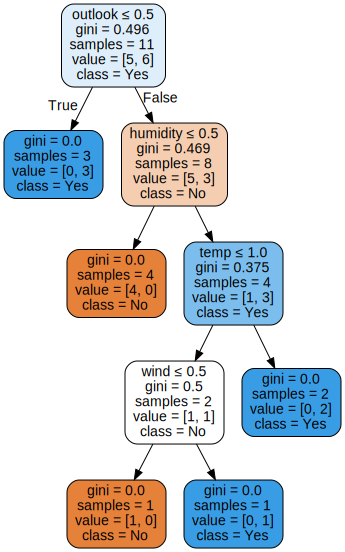

In [79]:
dot_data = export_graphviz(m2,feature_names= x.columns, class_names= ['No','Yes'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [0]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 15))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth)#random state sin
    clf.fit(x_train, y_train)    
    score = clf.score(x_val, y_val)
    
    accuracy.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

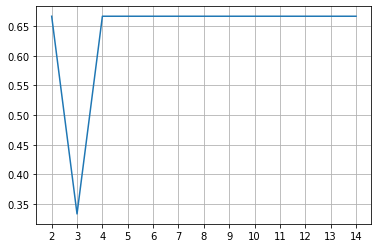

In [81]:
plt.plot(accuracy)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show() # x profundiad, y scores